In [2]:
import torch
from common.networks import *
from common.utils import *
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

### Variational AutoEncoder

In [5]:
lr=1e-3
batch_size=512
num_epoch = 100
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mnist_data = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(mnist_data, batch_size=batch_size, shuffle=True)

In [6]:
# Initialize model, optimizer, loss
vae = VariationalAutoEncoder(input_dim=784, z_dim=2, device=device).to(device)
optimizer = torch.optim.Adam(vae.parameters(), lr=lr)
loss_fn = torch.nn.BCELoss(reduction='none')
# Run training
vae.train(num_epoch, optimizer, loss_fn, train_loader)

118it [00:08, 13.71it/s, loss=186]
118it [00:08, 13.19it/s, loss=175]
118it [00:08, 13.13it/s, loss=163]
118it [00:09, 12.77it/s, loss=158]
118it [00:08, 13.21it/s, loss=149]
118it [00:09, 12.43it/s, loss=161]
118it [00:09, 12.97it/s, loss=143]
118it [00:08, 13.60it/s, loss=154]
118it [00:09, 12.94it/s, loss=153]
118it [00:09, 12.73it/s, loss=149]
118it [00:09, 12.85it/s, loss=145]
118it [00:09, 12.65it/s, loss=149]
118it [00:09, 12.52it/s, loss=154]
118it [00:09, 12.79it/s, loss=140]
118it [00:09, 13.00it/s, loss=143]
118it [00:08, 14.39it/s, loss=147]
118it [00:08, 14.32it/s, loss=139]
118it [00:08, 13.72it/s, loss=145]
118it [00:09, 12.60it/s, loss=143]
118it [00:08, 13.18it/s, loss=140]
118it [00:08, 13.96it/s, loss=149]
118it [00:09, 12.91it/s, loss=146]
118it [00:09, 12.79it/s, loss=147]
118it [00:09, 12.79it/s, loss=149]
118it [00:08, 13.14it/s, loss=145]
118it [00:09, 12.21it/s, loss=133]
118it [00:09, 12.30it/s, loss=142]
118it [00:08, 14.03it/s, loss=145]
118it [00:09, 12.86i

### Nombre of parameters
The number of parameters of our VAE is indicated below

In [7]:
nombre_param = sum([p.numel() for p in vae.parameters() if p.requires_grad])
nombre_param

1068820

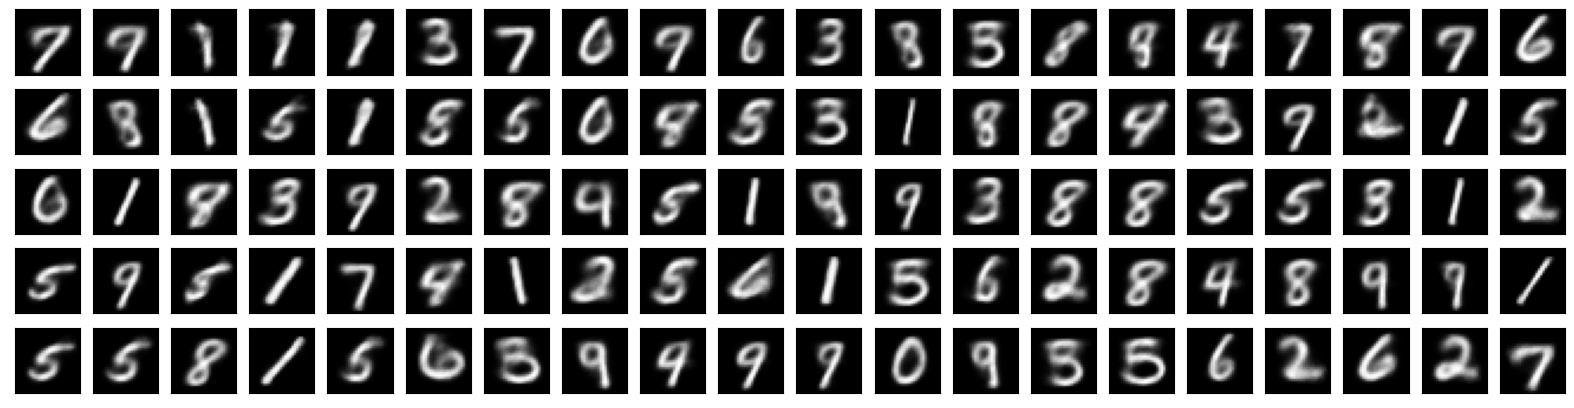

In [8]:
gen_vae = vae.generate_images(num_samples=100) # we generate 100 samples and perform 100 gibbs sampling
plt.figure(figsize=(20,5))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(gen_vae[i].detach().cpu().numpy().reshape(28,28),cmap='gray')
    plt.xticks([])
    plt.yticks([])

### RBM

In [9]:
# Create a DataLoader
train_dataset,_ = load_mnist(300)
pretrain_set = [i[0] for i in train_dataset]
np.random.shuffle(pretrain_set)
digits_test = torch.stack(pretrain_set).float()

In [11]:
device =  torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
n_steps = 1000
gibbs = 1
alpha = 1e-1
digits_test = digits_test.to(device)
batch_size = 512
rbm = RBM(input_size=784,hidden_size=1200,device=device)
print("Number of parameters RBM := {}".format(rbm.parameters()))

Number of parameters RBM := 942784


In [12]:
rbm.train(data=digits_test,n_steps=n_steps,alpha=alpha,batch_size=batch_size,k=gibbs) 

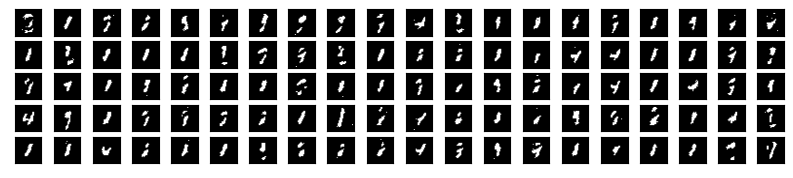

In [14]:
gen = rbm.generate(100,100)
plt.figure(figsize=(10,2))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(gen[i].detach().cpu().numpy().reshape(28,28),cmap='gray')
    plt.xticks([]),plt.yticks([])

### DBN

In [15]:
# init the DBN with 3 layers 
hidden_sizes = [1000,500,250]
input_size = 784
dbn = DBN(input_size,hidden_sizes,device)
print("Number of parameters DBN := {}".format(dbn.parameters()))

Number of parameters DBN := 1413034


In [18]:
dbn.train(data=digits_test,n_steps=5000,alpha=1e-1,batch_size=128)

100%|██████████| 3/3 [01:20<00:00, 26.98s/it]


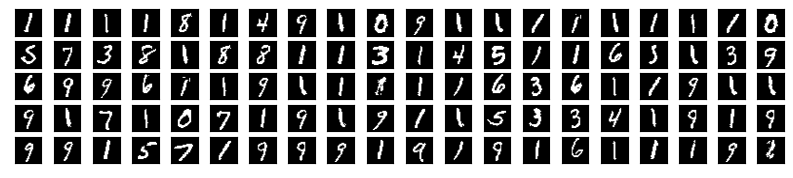

In [19]:
gen2 = dbn.generate(100,1000) 
plt.figure(figsize=(10,2))
for i in range(100):
    plt.subplot(5,20,i+1)
    plt.imshow(gen2[i].detach().cpu().numpy().reshape(28,28),cmap='gray')
    plt.xticks([]),plt.yticks([])